In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_excel('../input/data_merged.xlsx')

data.shape  

(147, 845)

<Axes: xlabel='Frailty_State_GFST'>

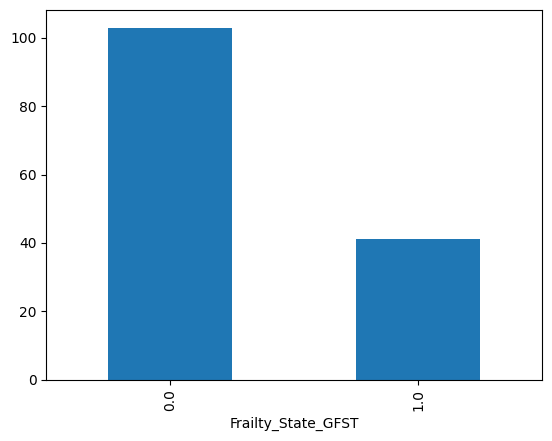

In [9]:
# Plot class distribution to check for class imbalance
data['Frailty_State_GFST'].value_counts().plot(kind='bar')



<Axes: xlabel='Fried_State'>

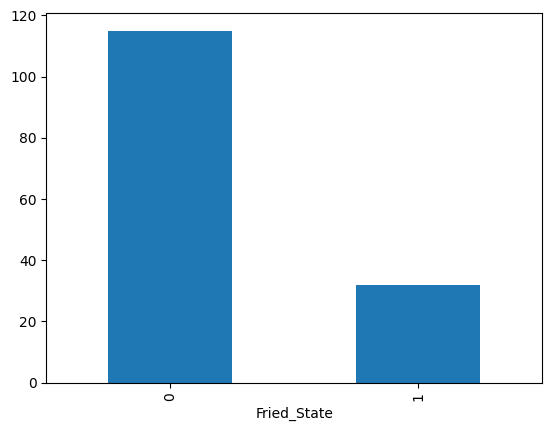

In [10]:
# class imbalance for FRIED
data['Fried_State'].value_counts().plot(kind='bar')

In [15]:
pos_weight_class_fried= len(data['Fried_State'] - np.sum(data['Fried_State'])) / np.sum(data['Fried_State'])
print(pos_weight_class_fried)

pos_weight_class_gfst= len(data['Frailty_State_GFST'] - np.sum(data['Frailty_State_GFST'])) / np.sum(data['Frailty_State_GFST'])
print(pos_weight_class_gfst)


# Or : sum(negative_class) / sum(positive_class)
fried_ratio = np.sum(data['Fried_State']) / np.sum(data['Fried_State'])
print(fried_ratio)

gfst_ratio = np.sum(data['Frailty_State_GFST']) / np.sum(data['Frailty_State_GFST'])
print(gfst_ratio)

4.59375
3.5853658536585367
1.0
1.0


In [6]:
# merge data
# datasets shape
print(df_questions.shape, df_gait.shape, df_posture.shape, df_grip.shape)

# merge
df_merged = pd.merge(df_questions, df_posture, on='Foldername', how='outer')
df_merged = pd.merge(df_merged, df_gait, on='Foldername', how='outer')
df_merged = pd.merge(df_merged, df_grip, on='Foldername', how='outer')

df_merged.shape

(144, 421) (115, 108) (127, 312) (96, 14)


(147, 852)

In [13]:
# encode False -> 0, True -> 1 in all columns
def custom_encoding(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    elif pd.isnull(x):
        return np.nan
    else:
        return x    

df_merged = df_merged.applymap(custom_encoding)


C:\Users\matth\AppData\Local\Temp\ipykernel_19244\3867387058.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged = df_merged.applymap(custom_encoding)


In [14]:
# save
df_merged.to_excel('../input/data_merged.xlsx', index=False)

In [7]:
object_columns = data.select_dtypes(include=['object']).columns

print(object_columns)

Index(['Foldername', 'bilan_date_baseline_romberg',
       'bilan_date_follow-up_romberg'],
      dtype='object')
